# SLU12: Feature Engineering: Examples notebook

In this notebook we will cover the following:
* Types of statistical data
* Dealing with numerical features
* Dealing with categorical features

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer, Binarizer, MinMaxScaler, Normalizer, StandardScaler, RobustScaler
import category_encoders as ce

plt.rcParams["figure.figsize"] = [5.6, 4.2]

In [2]:
avengers = pd.read_csv('data/avengers.csv')

## 1. Types of data in Pandas

### 1.1. Numerical and object dtypes

In [3]:
# see the data types
avengers.dtypes

Name            object
Active          object
Gender          object
Membership      object
Universe        object
Appearances      int64
TotalDeaths      int64
TotalReturns     int64
dtype: object

In [4]:
# set more specific data types
avengers = avengers.convert_dtypes()

In [5]:
# select by type
avengers.select_dtypes(include='string').head(3)

,Name,Active,Gender,Membership,Universe
0,"Henry Jonathan ""Hank"" Pym",YES,MALE,Full,Earth-616
1,Janet van Dyne,YES,FEMALE,Full,Earth-616
2,"Anthony Edward ""Tony"" Stark",YES,MALE,Full,Earth-616


### 1.2. Category dtype

In [6]:
# transform to categorical
avengers_cat = avengers.copy()
avengers_cat['Universe'] = avengers['Universe'].astype('category')

In [7]:
# show categories
avengers_cat['Universe'].cat.categories

Index(['Earth-13034', 'Earth-616', 'Earth-6311', 'Earth-691', 'Earth-8009',
       'Earth-921', 'Earth-96020'],
      dtype='string')

In [8]:
# show if categories are ordered
avengers_cat['Universe'].cat.ordered

False

### 1.3 Ordinal categorical data

In [9]:
# transform to categorical without specifying order
avengers_ord = avengers.copy()
avengers_ord['Membership'] = avengers['Membership'].astype('category')

avengers_ord['Membership'].cat.categories

Index(['Academy', 'Full', 'Honorary', 'Probationary'], dtype='string')

In [10]:
# transform to categorical and  specifying order
ordered_cats = ['Honorary', 'Academy', 'Probationary', 'Full']
avengers_ord['Membership'] = avengers_ord['Membership'].cat.set_categories(ordered_cats, ordered=True)

avengers_ord['Membership'].min(), avengers_ord['Membership'].max()

('Honorary', 'Full')

## 2. Dealing with numerical data - sklearn-like transformers

### 2.1 Binning

In [11]:
# initialize the transformer with the desired options
binner = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')

# fit transformer to data
binner.fit(avengers[['Appearances']])

# create new feature by transforming the data
avengers['Appearances_bins'] = binner.transform(avengers[['Appearances']])

In [12]:
# show bin edges
binner.bin_edges_

array([array([2.0000e+00, 4.3510e+02, 8.6820e+02, 1.3013e+03, 1.7344e+03,
              2.1675e+03, 2.6006e+03, 3.0337e+03, 3.4668e+03, 3.8999e+03,
              4.3330e+03])                                               ],
      dtype=object)

### 2.2 Binarization

In [13]:
# initialize the transformer with the desired options
binarizer = Binarizer(threshold = 1000)

# fit transformer to data
binarizer.fit(avengers[['Appearances']])

# create new feature by transforming the data
avengers['Appearances_binary'] = binarizer.transform(avengers[['Appearances']])

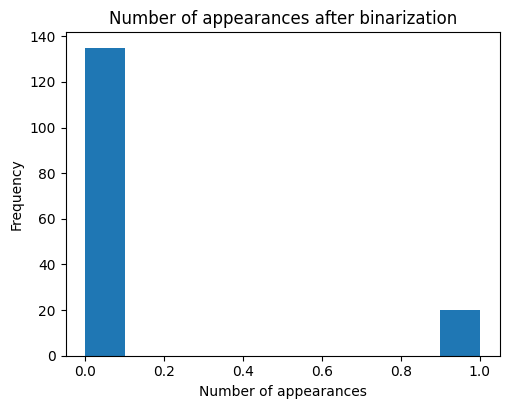

In [14]:
# plot histogram
avengers['Appearances_binary'].plot.hist();
plt.xlabel('Number of appearances');
plt.title('Number of appearances after binarization');

### 2.3 [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler)

In [15]:
# initialize the transformer with the desired options
minmaxscaler = MinMaxScaler(feature_range=(0,1))

# fit transformer to data
minmaxscaler.fit(avengers[['Appearances']])

# create new feature by transforming the data
avengers['Appearances_minmax'] = minmaxscaler.transform(avengers[['Appearances']])

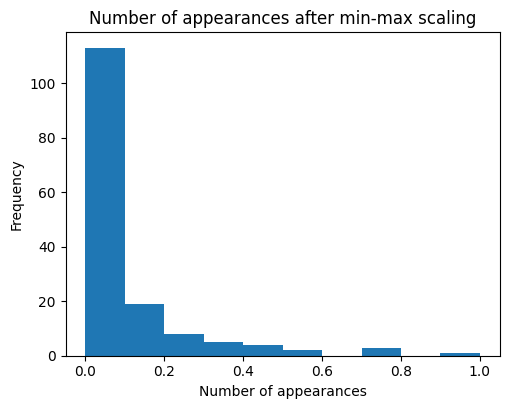

In [16]:
# plot histogram
avengers['Appearances_minmax'].plot.hist();
plt.xlabel('Number of appearances');
plt.title('Number of appearances after min-max scaling');

### 2.4 [Normalizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html)

In [17]:
# initialize the transformer with the desired options
normalizer = Normalizer(norm='l2')

# fit transformer to data
normalizer.fit(avengers[['Appearances', 'TotalDeaths', 'TotalReturns']])

# create new features by transforming the data
X_normalized = normalizer.transform(avengers[['Appearances', 'TotalDeaths', 'TotalReturns']])
avengers['Appearances_normalized'] = X_normalized[:, 0]
avengers['TotalDeaths_normalized'] = X_normalized[:, 1]
avengers['TotalReturns_normalized'] = X_normalized[:, 2]

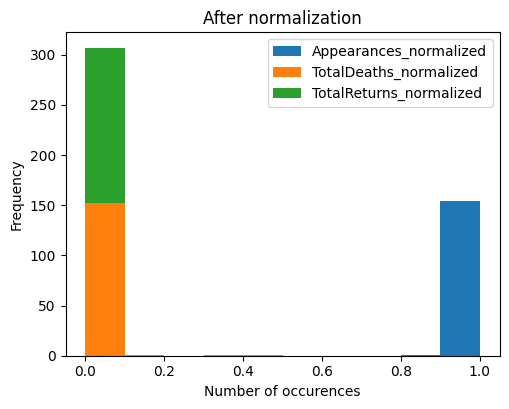

In [18]:
# plot histogram of normalized appearances
avengers[['Appearances_normalized', 'TotalDeaths_normalized','TotalReturns_normalized']].plot.hist(stacked=True);
plt.xlabel('Number of occurences');
plt.title('After normalization');

### 2.5 [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)

In [19]:
# initialize the transformer with the desired options
standardscaler = StandardScaler()

# fit transformer to data
standardscaler.fit(avengers[['Appearances']])

# create new feature by transforming the data
avengers['Appearances_standard_scaled'] = standardscaler.transform(avengers[['Appearances']])

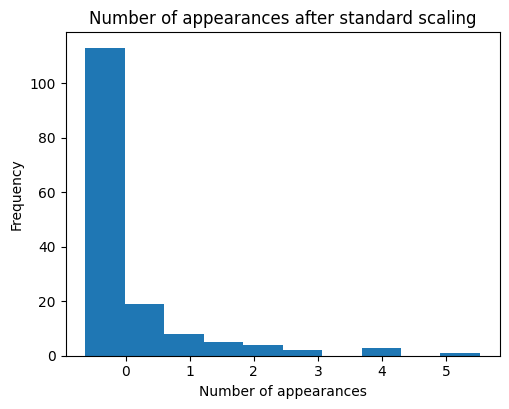

In [20]:
# plot histogram
avengers['Appearances_standard_scaled'].plot.hist();
plt.xlabel('Number of appearances');
plt.title('Number of appearances after standard scaling');

### 2.6 [RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler)

In [21]:
# initialize the transformer with the desired options
robustscaler = RobustScaler()

# fit transformer to data
robustscaler.fit(avengers[['Appearances']])

# create new feature by transforming the data
avengers['Appearances_robust_scaled'] = robustscaler.transform(avengers[['Appearances']])

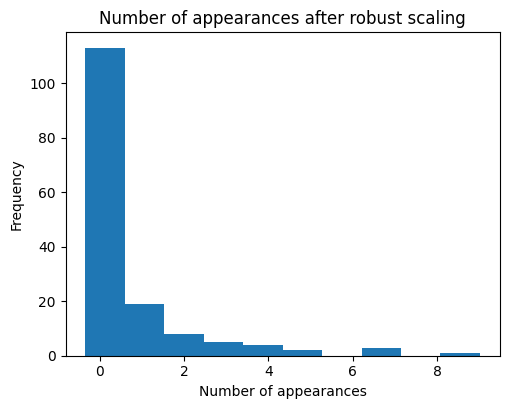

In [22]:
# plot histogram
avengers['Appearances_robust_scaled'].plot.hist();
plt.xlabel('Number of appearances');
plt.title('Number of appearances after robust scaling');

## 3. Dealing with categorical data - categorical encoders

### 3.1 Binary data

In [23]:
# use the map method to encode binary data
avengers = pd.read_csv('data/avengers.csv')

avengers['Active_mapped'] = avengers['Active'].map({'YES': 1, 'NO': 0})
avengers['Gender_mapped'] = avengers['Gender'].map({'MALE': 1, 'FEMALE': 0})
avengers.sample(5)

,Name,Active,Gender,Membership,Universe,Appearances,TotalDeaths,TotalReturns,Active_mapped,Gender_mapped
78,Maria de Guadalupe Santiago,NO,FEMALE,Full,Earth-616,43,0,0,0,0
33,Jennifer Walters,YES,FEMALE,Full,Earth-616,933,1,1,1,0
132,Alex Summers,YES,MALE,Full,Earth-616,592,0,0,1,1
77,Delroy Garrett Jr.,NO,MALE,Full,Earth-616,101,0,0,0,1
41,Marc Spector,NO,MALE,Full,Earth-616,402,0,0,0,1


### 3.2 Ordinal encoding

In [24]:
# initialize the transformer with the desired options
ordinalencoder = ce.ordinal.OrdinalEncoder()

# fit transformer to data
ordinalencoder.fit(avengers['Universe'])

# create new feature by transforming the data
X_encoded = ordinalencoder.transform(avengers['Universe'])
X_encoded.sample(5, random_state=9)

,Universe
73,4
51,3
89,1
122,1
26,2


In [25]:
# see the encoding
ordinalencoder.category_mapping

[{'col': 'Universe',
  'mapping': Earth-616      1
  Earth-691      2
  Earth-6311     3
  Earth-921      4
  Earth-96020    5
  Earth-8009     6
  Earth-13034    7
  NaN           -2
  dtype: int64,
  'data_type': dtype('O')}]

### 3.3 One-hot encoding

In [26]:
# initialize the transformer with the desired options
ohe = ce.one_hot.OneHotEncoder(use_cat_names=True, handle_unknown='indicator')

# fit transformer to data
ohe.fit(avengers['Universe'])

# create new feature by transforming the data
X_ohe = ohe.transform(avengers['Universe'])
X_ohe.sample(5, random_state=9)

,Universe_Earth-616,Universe_Earth-691,Universe_Earth-6311,Universe_Earth-921,Universe_Earth-96020,Universe_Earth-8009,Universe_Earth-13034,Universe_-1
73,0,0,0,1,0,0,0,0
51,0,0,1,0,0,0,0,0
89,1,0,0,0,0,0,0,0
122,1,0,0,0,0,0,0,0
26,0,1,0,0,0,0,0,0
